### PROPOSITION 1 : SECURING USER AUTHENTIFICATION ###

Group : ELYACOUBI Wassim - SINACOLA Enzo - DOMINGUES Théo - DESBOIS Paul

Class : Aéro 5 - CDI

Professor : GHARSALLI Leila

As a securing user authentication, Keystroke dynamic information could be used to verify or even try to determine the identity of the person who is producing the keystrokes. The techniques used to do this vary widely in sophistication and range from statistical techniques to artificial intelligence approaches like neural networks. Propose a small tutorial about the Keystroke dynamic information and how it can be a way for protecting sensitive information and assets as well as an anomaly detection tool. Then, based on the dataset ‘StrongPasswordData.csv’, analyze the latter and propose different classifier models for keystroke detection. Describe every used Machine Learning technique and the motivation behind its use.

### SOLUTION ###

For our solution, we will focus on supervized model to perform our analysis. The goal here is to set the target y as the "subject" column of our data, and for the X component we will drop the "subject", "sessionIndex" and "rep" columns and take the rest.

We will show 3 supervized models, each of them submitted to a GridSearch to find the best hyperparameter tuning. For each model we will keep the best hyperparameters. We will end with 3 final model wich will be used to make predictions and performance analysis.

For the models, after reading the document likend to the project and some informations on internet, we will use the following models : a SVM, a RandomForest and a KNeighborsClassifier.

Let's start by importing all the modules needed :

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier

We extract the data from the file StrongPasswordData.csv and set the target as "subject" and features used to make classification as everything except that we drop 'subject', 'sessionIndex' and 'rep'.

In [ ]:
file_path = 'StrongPasswordData.csv'
df = pd.read_csv(file_path)

# Assumant que 'subject' est la variable cible
target = df['subject']

# Suppression des colonnes inutiles pour les caractéristiques
features = df.drop(['subject', 'sessionIndex', 'rep'], axis=1)


We split the data as 80% train and 20% test since we have a huge amount of data. We also suffle data to make the training more precise.

In [ ]:
# Division du jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, shuffle=True)


Now we have all the variables needed to perform a complete analysis with out 3 models.

## 1. SVM Model##

Let's start with a GridSearch :

We tried to range the panel of hyperparameters so we have more chance to get better results, and for each combination we repeat it 3 times.

In [ ]:
# SVM
svm_model = SVC(random_state=42, verbose=True)

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100],  # Regularization parameter
              'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
              'gamma': ['scale', 'auto', 0.1, 1, 10]}  # Kernel coefficient

# Create an SVM model
svm_model = SVC(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(svm_model, param_grid, cv=3, scoring='accuracy', verbose=4, n_jobs=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Get the best model
best_svm_model = grid_search.best_estimator_


Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV 1/3] END .C=0.1, gamma=scale, kernel=linear;, score=0.849 total time=   6.0s
[CV 2/3] END .C=0.1, gamma=scale, kernel=linear;, score=0.849 total time=   5.1s
[CV 3/3] END .C=0.1, gamma=scale, kernel=linear;, score=0.851 total time=   5.5s
[CV 1/3] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.790 total time=  14.6s
[CV 2/3] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.789 total time=  14.0s
[CV 3/3] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.790 total time=  14.1s
[CV 1/3] END ...C=0.1, gamma=scale, kernel=poly;, score=0.327 total time=  13.6s
[CV 2/3] END ...C=0.1, gamma=scale, kernel=poly;, score=0.335 total time=  13.6s
[CV 3/3] END ...C=0.1, gamma=scale, kernel=poly;, score=0.352 total time=  13.8s
[CV 1/3] END ..C=0.1, gamma=auto, kernel=linear;, score=0.849 total time=   6.1s
[CV 2/3] END ..C=0.1, gamma=auto, kernel=linear;, score=0.849 total time=   6.3s
[CV 3/3] END ..C=0.1, gamma=auto, kernel=linear

For the SVM Model we will keep the following hyperparameters : {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}. It performs with precision of 88.7 %.

We make some predictions :

In [ ]:
# Predict on the test set with the best model
y_pred_best_svm = best_svm_model.predict(X_test)

# Evaluate the best model
accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)
classification_report_best_svm = classification_report(y_test, y_pred_best_svm)

print("\nBest SVM Accuracy testing:", accuracy_best_svm)
print("Best SVM Classification Report:\n", classification_report_best_svm)


Best SVM Accuracy testing: 0.9004901960784314
Best SVM Classification Report:
               precision    recall  f1-score   support

        s002       0.73      0.86      0.79        72
        s003       0.94      0.86      0.89        69
        s004       0.88      0.89      0.88        73
        s005       0.94      0.92      0.93        73
        s007       0.79      0.83      0.81        54
        s008       0.87      0.84      0.85        87
        s010       0.93      0.98      0.95        97
        s011       0.89      0.88      0.89        75
        s012       0.94      0.88      0.91        93
        s013       0.93      0.96      0.95        72
        s015       0.92      0.89      0.90        87
        s016       0.87      0.94      0.90        85
        s017       1.00      0.95      0.97        82
        s018       0.83      0.85      0.84        73
        s019       0.96      0.96      0.96        80
        s020       0.84      0.81      0.83        86
 

The predictions gave a 90 % of precision. We can see that for some subjects, it performs very well, even almost perfectly, but some of the subjects are a little too hard to predict for the model. In average, it seems alright.

## 2. RandomForestClassifier ##

We start with a GridSearch :

In [ ]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, verbose=4, scoring='accuracy')

# Fit the model with the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV 1/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.917 total time=   4.4s
[CV 2/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.915 total time=   3.6s
[CV 3/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.918 total time=   3.6s
[CV 1/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.925 total time=   8.0s
[CV 2/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.922 total time=   7.6s
[CV 3/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.928 total time=   7.6s
[CV 1/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.929 total time=  14.9s
[CV 2/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.926

In [ ]:
# Predict on the test set using the best model
y_pred_rf_grid = best_rf_model.predict(X_test)

# Evaluate the model with the best parameters
accuracy_rf_grid = accuracy_score(y_test, y_pred_rf_grid)
classification_report_rf_grid = classification_report(y_test, y_pred_rf_grid)

print("Best Random Forest Parameters:", best_params)
print("Best Random Forest Accuracy:", accuracy_rf_grid)
print("Best Random Forest Classification Report:\n", classification_report_rf_grid)

Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest Accuracy: 0.9377450980392157
Best Random Forest Classification Report:
               precision    recall  f1-score   support

        s002       0.85      0.83      0.84        72
        s003       0.92      0.87      0.90        69
        s004       0.89      0.92      0.91        73
        s005       0.93      0.96      0.95        73
        s007       0.84      0.87      0.85        54
        s008       0.93      0.80      0.86        87
        s010       0.98      0.95      0.96        97
        s011       0.97      0.92      0.95        75
        s012       0.96      0.92      0.94        93
        s013       0.99      0.96      0.97        72
        s015       0.96      0.92      0.94        87
        s016       0.95      0.99      0.97        85
        s017       0.99      0.99      0.99        82
        s018       0.98      0.84

For the RFC Model we will keep the following hyperparameters : {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}. It performs with precision of 93.8 %.

For the predictions, we have a 94% accuracy, but now it performs better overall on all the targets.

## 3. KNeighborsClassifier ##

Let's start with a GridSearch :

In [ ]:
# Define the parameter grid to search
param_grid_knn = {
    'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 for Manhattan distance, p=2 for Euclidean distance
}

# Create KNeighborsClassifier
knn_model = KNeighborsClassifier()

# Create GridSearchCV object
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=5, verbose=4, scoring='accuracy')

# Fit the model with the grid search
grid_search_knn.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params_knn = grid_search_knn.best_params_
best_knn_model = grid_search_knn.best_estimator_



Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END n_neighbors=2, p=1, weights=uniform;, score=0.853 total time=   1.8s
[CV 2/5] END n_neighbors=2, p=1, weights=uniform;, score=0.874 total time=   1.7s
[CV 3/5] END n_neighbors=2, p=1, weights=uniform;, score=0.860 total time=   1.8s
[CV 4/5] END n_neighbors=2, p=1, weights=uniform;, score=0.862 total time=   1.8s
[CV 5/5] END n_neighbors=2, p=1, weights=uniform;, score=0.861 total time=   1.9s
[CV 1/5] END n_neighbors=2, p=1, weights=distance;, score=0.879 total time=   2.5s
[CV 2/5] END n_neighbors=2, p=1, weights=distance;, score=0.890 total time=   1.8s
[CV 3/5] END n_neighbors=2, p=1, weights=distance;, score=0.885 total time=   1.7s
[CV 4/5] END n_neighbors=2, p=1, weights=distance;, score=0.879 total time=   1.6s
[CV 5/5] END n_neighbors=2, p=1, weights=distance;, score=0.882 total time=   1.6s
[CV 1/5] END n_neighbors=2, p=2, weights=uniform;, score=0.799 total time=   0.4s
[CV 2/5] END n_neighbors=2, p=2

In [ ]:
# Predict on the test set using the best model
y_pred_knn_grid = best_knn_model.predict(X_test)

# Evaluate the model with the best parameters
accuracy_knn_grid = accuracy_score(y_test, y_pred_knn_grid)
classification_report_knn_grid = classification_report(y_test, y_pred_knn_grid)

print("Best K-Nearest Neighbors Parameters:", best_params_knn)
print("Best K-Nearest Neighbors Accuracy:", accuracy_knn_grid)
print("Best K-Nearest Neighbors Classification Report:\n", classification_report_knn_grid)

Best K-Nearest Neighbors Parameters: {'n_neighbors': 8, 'p': 1, 'weights': 'distance'}
Best K-Nearest Neighbors Accuracy: 0.9120098039215686
Best K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

        s002       0.74      0.89      0.81        72
        s003       0.93      0.81      0.87        69
        s004       0.91      0.92      0.91        73
        s005       0.95      0.95      0.95        73
        s007       0.77      0.91      0.83        54
        s008       0.91      0.82      0.86        87
        s010       0.92      0.97      0.94        97
        s011       0.98      0.87      0.92        75
        s012       0.98      0.94      0.96        93
        s013       0.92      0.99      0.95        72
        s015       0.97      0.84      0.90        87
        s016       0.83      0.98      0.90        85
        s017       0.96      0.96      0.96        82
        s018       0.95      0.79      0.87        73

For the KNN Model we will keep the following hyperparameters : {'n_neighbors': 8, 'p': 1, 'weights': 'distance'}. It performs with precision of 91.2 %.

For the predictions we have a 91% precision, but it seems less precise than the RFC for some targets, but stays better than the SVM model.

## Final Models ##

Let's compute our 3 best models and compare their performances :

In [ ]:
####################### SVM #################################

# Create an SVM model with the specified parameters
svm_model = SVC(C=10, gamma='auto', kernel='rbf')

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_best_svm = svm_model.predict(X_test)

####################### RFC #################################

# Create a Random Forest Classifier with the specified parameters
rfc_model = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200)

# Train the model on the training data
rfc_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_best_rfc = rfc_model.predict(X_test)

###################### KNN ##################################

# Create a k-Nearest Neighbors Classifier with the specified parameters
knn_model = KNeighborsClassifier(n_neighbors=8, p=1, weights='distance')

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_best_knn = knn_model.predict(X_test)



## PERFORMANCES ANALYSIS ##

We can start to plot the confusion matrix for each model :

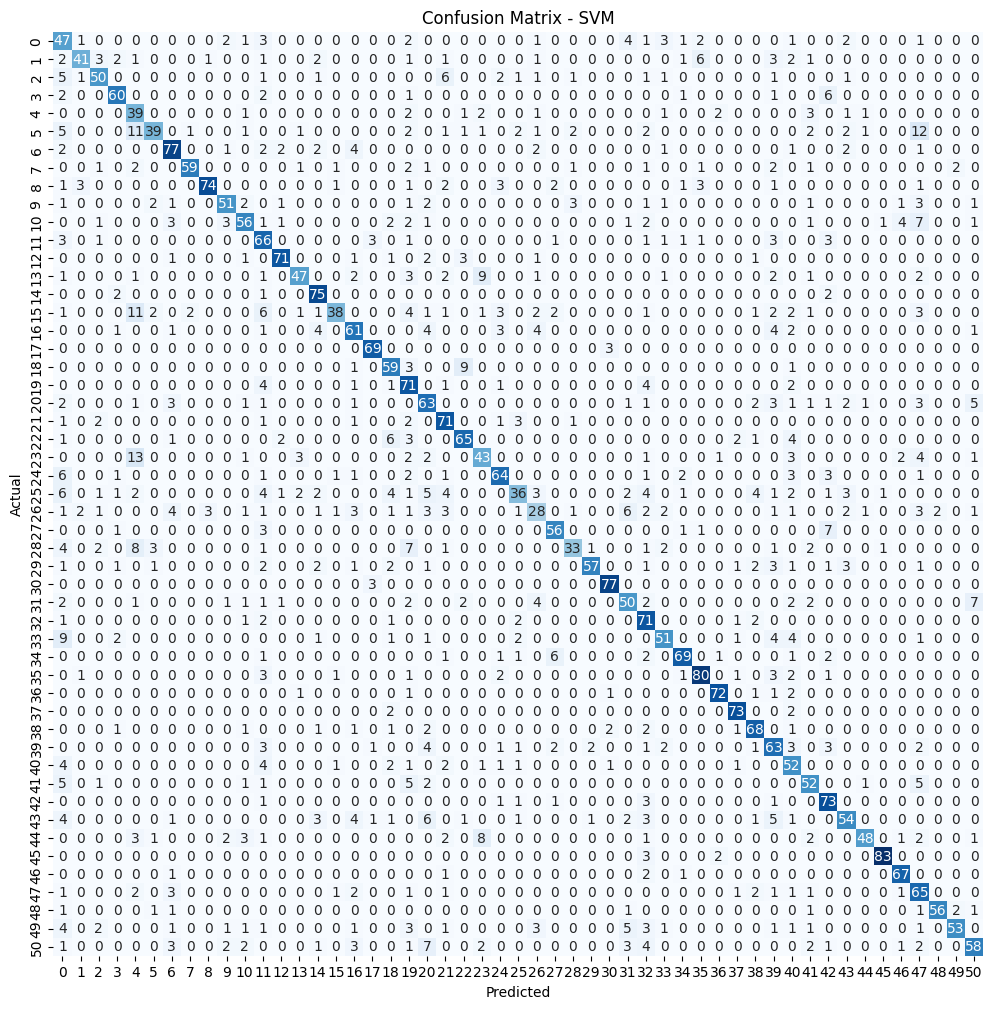

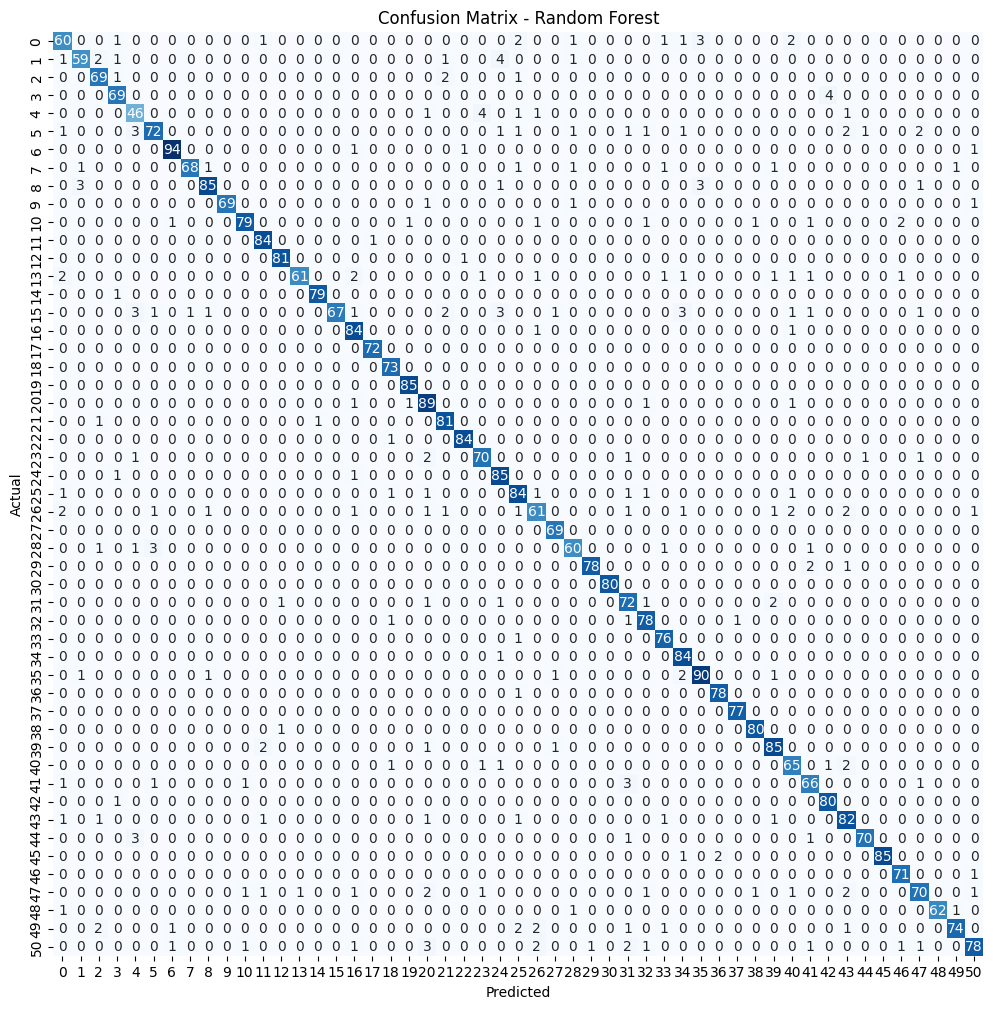

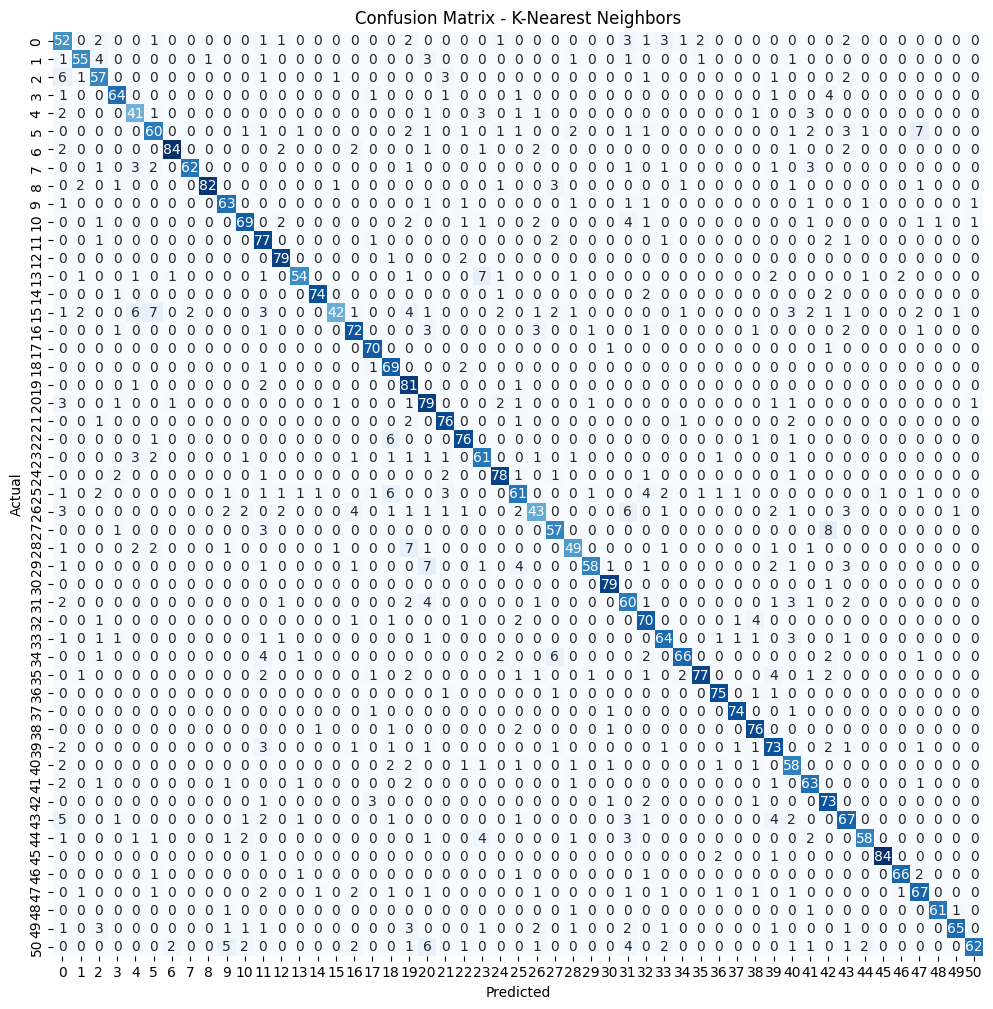

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 12))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix for SVM
plot_confusion_matrix(y_test, y_pred_best_svm, 'SVM')

# Plot confusion matrix for RFC
plot_confusion_matrix(y_test, y_pred_best_rfc, 'Random Forest')

# Plot confusion matrix for KNN
plot_confusion_matrix(y_test, y_pred_best_knn, 'K-Nearest Neighbors')


As predicted, the RFC performed better since the diagonal of the matrix tends to have greater values, meaning here we have less false-positives and less false negatives than the KNN and SVM.

Same thing, the KNN performs better than SVM but is less precise than RFC.

With only that tools we can say : RFC > KNN > SVM .

Since our data is multiclass, some tools we used to show like ROC curves can't be performed. After some research, we found out that we can use some indicators other thant classification report used previously. For example we have the Cohen's Kappa measure.

Cohen's Kappa scores provide insight into the level of agreement beyond chance between the predicted and actual classes for each model. Here's an interpretation based on the scores you provided

In [ ]:
from sklearn.metrics import cohen_kappa_score

# Calculate Cohen's Kappa for SVM
kappa_svm = cohen_kappa_score(y_test, y_pred_best_svm)
print(f'Cohen\'s Kappa - SVM: {kappa_svm:.2f}')

# Calculate Cohen's Kappa for RFC
kappa_rfc = cohen_kappa_score(y_test, y_pred_best_rfc)
print(f'Cohen\'s Kappa - Random Forest: {kappa_rfc:.2f}')

# Calculate Cohen's Kappa for KNN
kappa_knn = cohen_kappa_score(y_test, y_pred_best_knn)
print(f'Cohen\'s Kappa - K-Nearest Neighbors: {kappa_knn:.2f}')

Cohen's Kappa - SVM: 0.73
Cohen's Kappa - Random Forest: 0.93
Cohen's Kappa - K-Nearest Neighbors: 0.83


From these scores:

Random Forest seems to perform exceptionally well, demonstrating the highest agreement among the models.
SVM and KNN also perform well, with SVM slightly lower than KNN but still showing substantial agreement.

SVM: Cohen's Kappa of 0.73

There's a substantial agreement between the SVM's predictions and the actual classes, indicating a reasonably good performance.
Random Forest (RFC): Cohen's Kappa of 0.93

The RFC demonstrates a very high level of agreement between predicted and actual classes, suggesting a strong performance with a high level of accuracy.
K-Nearest Neighbors (KNN): Cohen's Kappa of 0.83

KNN also shows a substantial agreement between predicted and actual classes, indicating a good performance, though slightly below RFC.

Antoher indicator we can use is the Hamming loss : Hamming Loss measures the fraction of labels that are incorrectly predicted. Lower Hamming Loss values indicate better model performance.

In [ ]:
from sklearn.metrics import hamming_loss

# Calculate Hamming Loss for SVM
hamming_loss_svm = hamming_loss(y_test, y_pred_best_svm)
print(f'Hamming Loss - SVM: {hamming_loss_svm:.2f}')

# Calculate Hamming Loss for RFC
hamming_loss_rfc = hamming_loss(y_test, y_pred_best_rfc)
print(f'Hamming Loss - Random Forest: {hamming_loss_rfc:.2f}')

# Calculate Hamming Loss for KNN
hamming_loss_knn = hamming_loss(y_test, y_pred_best_knn)
print(f'Hamming Loss - K-Nearest Neighbors: {hamming_loss_knn:.2f}')


Hamming Loss - SVM: 0.26
Hamming Loss - Random Forest: 0.06
Hamming Loss - K-Nearest Neighbors: 0.17


In summary, based on the Hamming Loss metric:

Random Forest (RFC) appears to have the best performance among the models.
K-Nearest Neighbors (KNN) performs reasonably well, falling between SVM and RFC.
Support Vector Machine (SVM) has a higher Hamming Loss, indicating a comparatively lower label prediction accuracy.

A last indicator we can use is Matthews Correlation Coefficient (MCC) : The Matthews Correlation Coefficient ranges from -1 to 1, where:

1 indicates a perfect prediction,
0 indicates no better than random prediction, and
-1 indicates total disagreement between prediction and observation.

In [ ]:
from sklearn.metrics import matthews_corrcoef

# Calculate MCC for SVM
mcc_svm = matthews_corrcoef(y_test, y_pred_best_svm)
print(f'Matthews Correlation Coefficient - SVM: {mcc_svm:.2f}')

# Calculate MCC for RFC
mcc_rfc = matthews_corrcoef(y_test, y_pred_best_rfc)
print(f'Matthews Correlation Coefficient - Random Forest: {mcc_rfc:.2f}')

# Calculate MCC for KNN
mcc_knn = matthews_corrcoef(y_test, y_pred_best_knn)
print(f'Matthews Correlation Coefficient - K-Nearest Neighbors: {mcc_knn:.2f}')


Matthews Correlation Coefficient - SVM: 0.73
Matthews Correlation Coefficient - Random Forest: 0.94
Matthews Correlation Coefficient - K-Nearest Neighbors: 0.83


Random Forest (RFC) has the highest MCC, suggesting exceptional overall performance.
K-Nearest Neighbors (KNN) and Support Vector Machine (SVM) also perform well, with KNN slightly outperforming SVM according to MCC.

What we can also do is to plot class-wise roc curves to watch for each model what class may be failing in the prediction : the more the curves are up-left positionned on the graph means the prediction is less failing in predictions.

SVM ROC CURVES CLASS-WISE :

<Figure size 800x800 with 0 Axes>

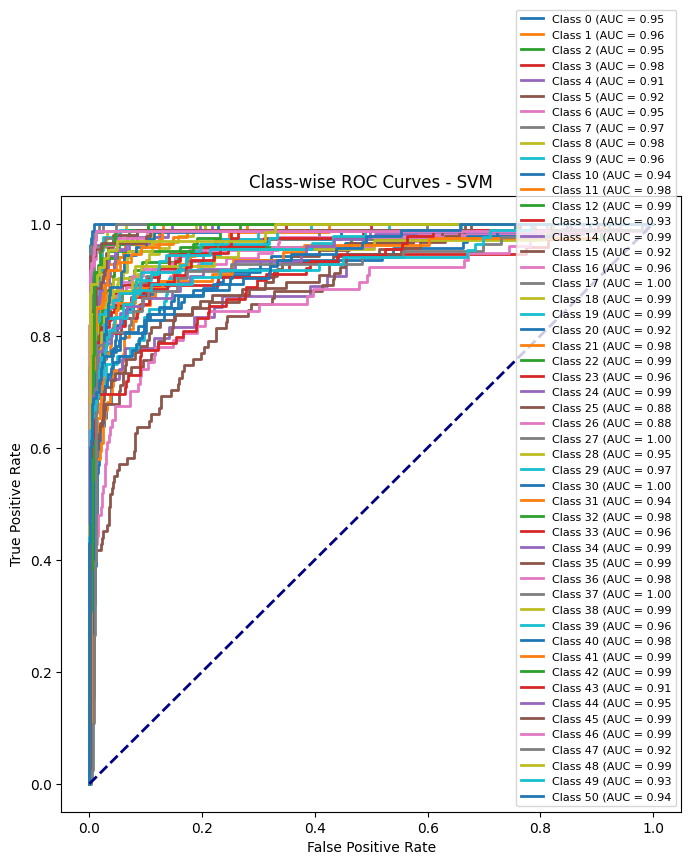

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

# Convert y_test and y_pred_best_svm to binary indicators
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# SVM decision function values
decision_values_svm = svm_model.decision_function(X_test)

# Plot ROC curves for each class
n_classes = y_test_bin.shape[1]
plt.figure(figsize=(8, 8))
# Plot ROC curves for each class with a smaller legend
plt.figure(figsize=(8, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], decision_values_svm[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Class-wise ROC Curves - SVM')

# Adjust the size of the legend
plt.legend(loc='lower right', prop={'size': 8})
plt.show()



RFC ROC CURVE CLASS-WISE :

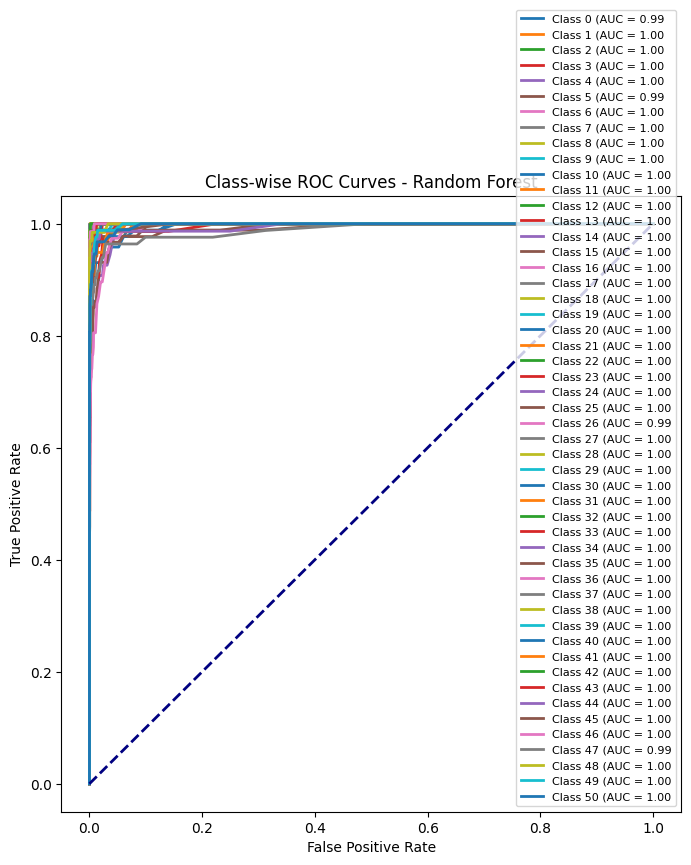

In [ ]:
# Convert y_test and y_pred_best_rfc to binary indicators
y_test_bin_rfc = label_binarize(y_test, classes=np.unique(y_test))

# RFC predicted probabilities
y_pred_prob_rfc = rfc_model.predict_proba(X_test)

# Plot ROC curves for each class with a smaller legend
plt.figure(figsize=(8, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin_rfc[:, i], y_pred_prob_rfc[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Class-wise ROC Curves - Random Forest')

# Adjust the size of the legend
plt.legend(loc='lower right', prop={'size': 8})
plt.show()


KNN ROC CUVE CLASS-WISE :

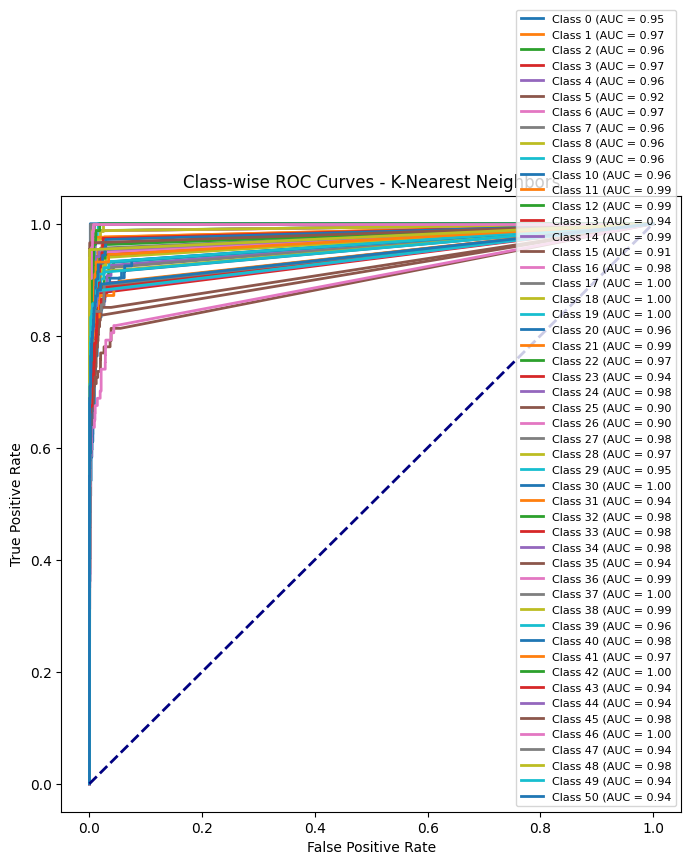

In [ ]:
# Convert y_test and y_pred_best_knn to binary indicators
y_test_bin_knn = label_binarize(y_test, classes=np.unique(y_test))

# KNN predicted probabilities
y_pred_prob_knn = knn_model.predict_proba(X_test)

# Plot ROC curves for each class with a smaller legend
plt.figure(figsize=(8, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin_knn[:, i], y_pred_prob_knn[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Class-wise ROC Curves - K-Nearest Neighbors')

# Adjust the size of the legend
plt.legend(loc='lower right', prop={'size': 8})
plt.show()


We can rapidly see that, as predicted with the other indicators, RFC has the best curves for each class. We can also see that for some features, KNN and SVM are struggling to make the difference between subjects.